<a href="https://colab.research.google.com/github/proxi190/Vu-tru/blob/master/Visualize_augmented_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
X_train = np.load('/content/drive/MyDrive/MLMed/Brain_tumor/X_train.npy')

In [ ]:
train_aug = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')
train_aug.fit(X_train)

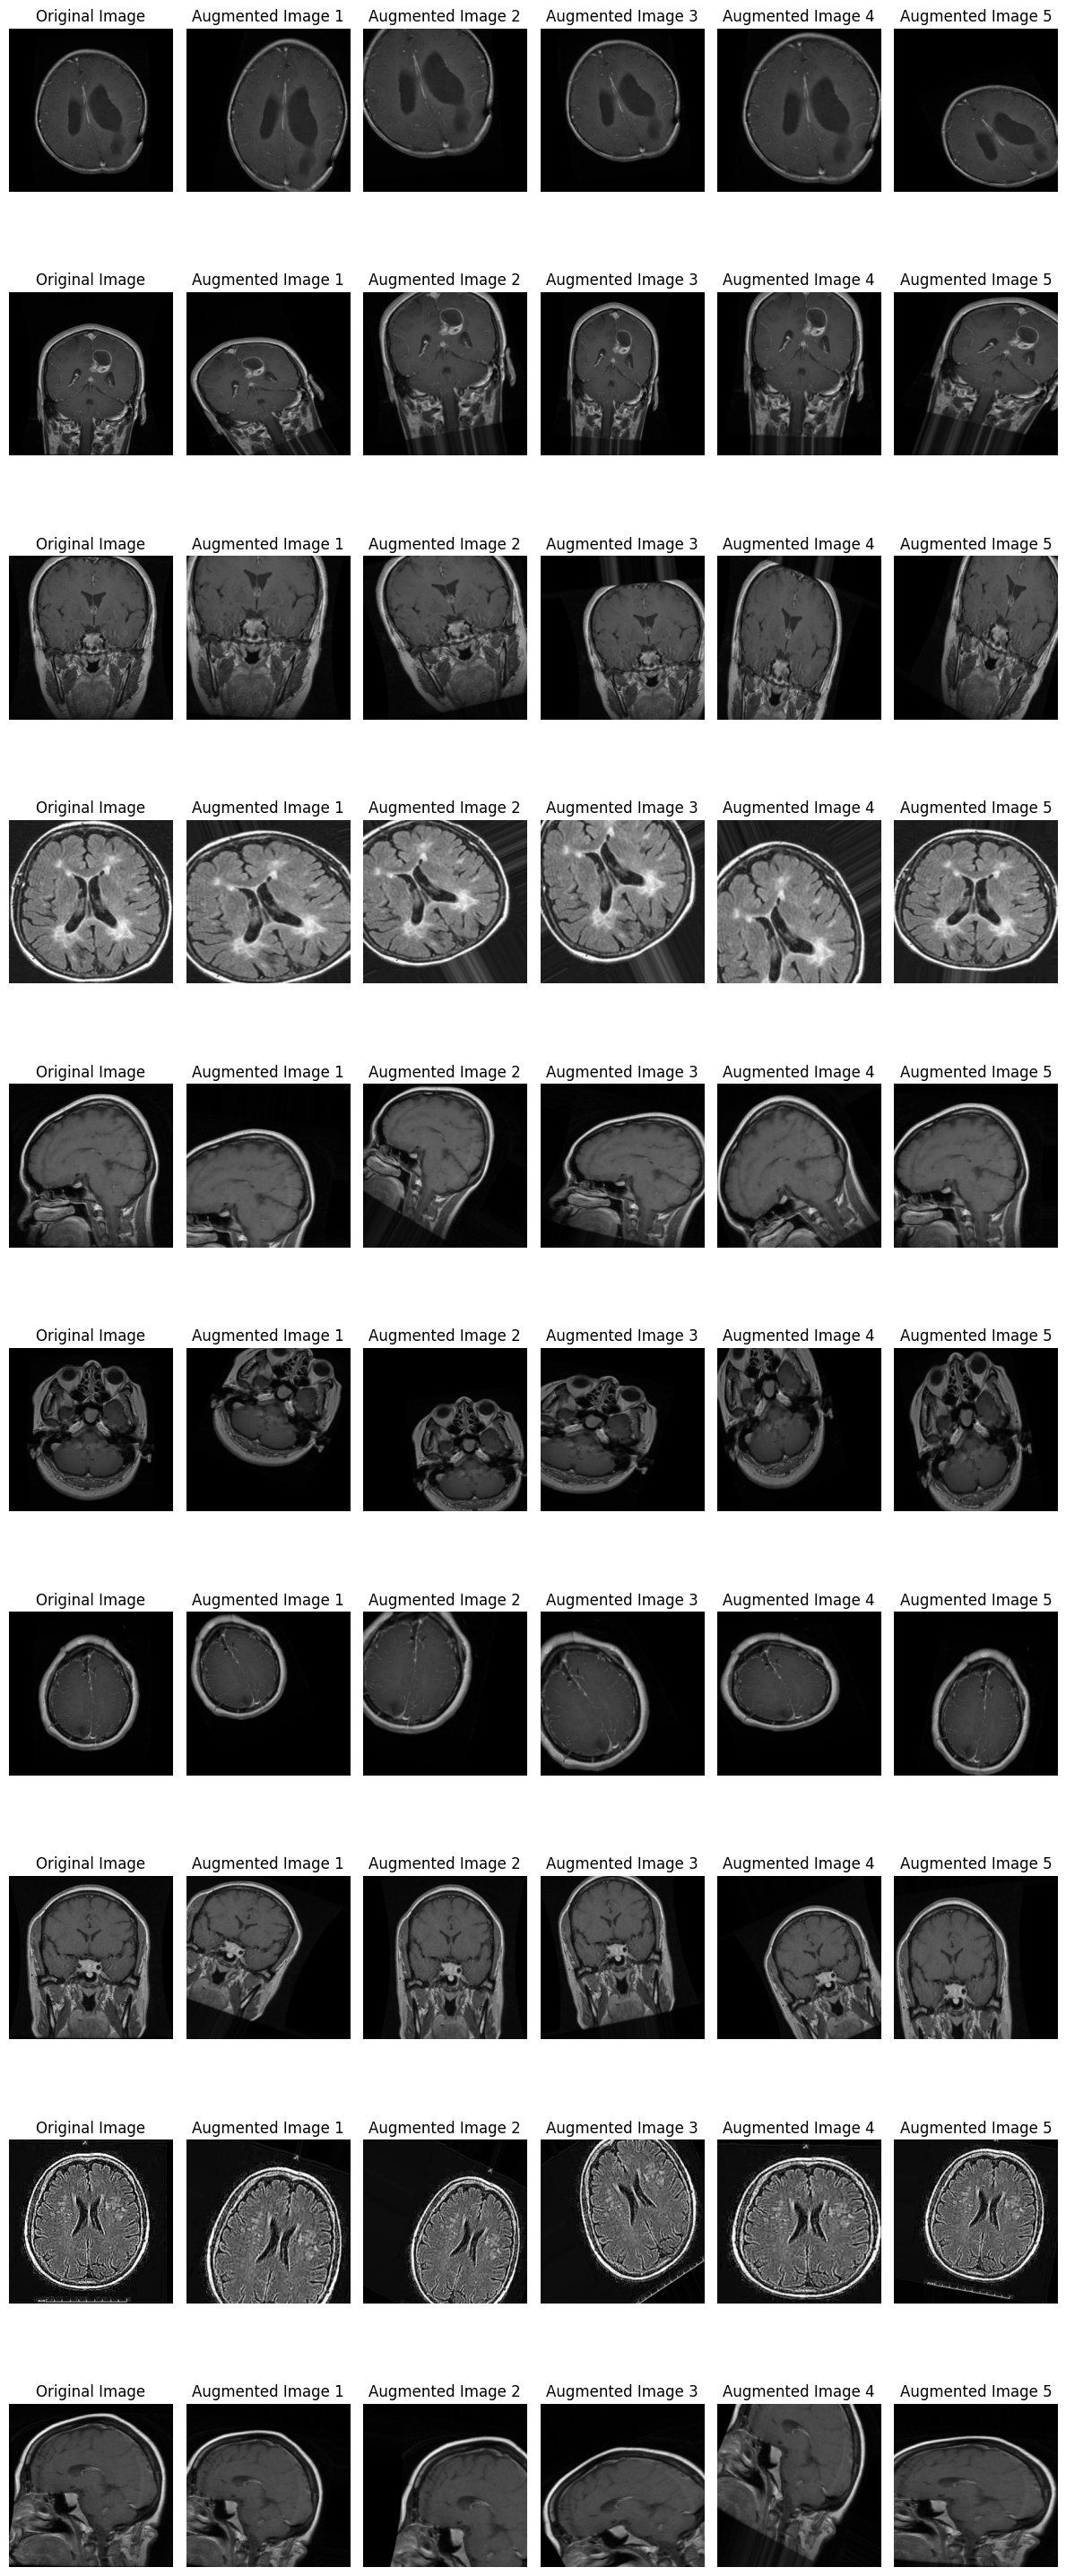

In [ ]:
def visualize_augmented_images(data_gen, X_data, num_samples, num_augmented_images):
    X_data = np.array(X_data)

    augmented_images = []
    for sample in X_data[:num_samples]:
        sample_expanded = np.expand_dims(sample, 0)

        augmented_samples = [sample]
        for _ in range(num_augmented_images):
            augmented = data_gen.random_transform(sample)
            #augmented = np.squeeze(augmented, axis=0)
            augmented_samples.append(augmented)
        augmented_images.append(augmented_samples)

    fig, axes = plt.subplots(num_samples, num_augmented_images + 1, figsize=(12, num_samples * 3))
    for i, samples in enumerate(augmented_images):
        for j, image in enumerate(samples):
            if image.shape[-1] == 1:
                axes[i,j].imshow(image.squeeze(), cmap='gray')
            else:
                axes[i,j].imshow(image)
            if j == 0:
                axes[i, j].set_title('Original Image')
            else:
                axes[i,j].set_title(f'Augmented Image {j}')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

visualize_augmented_images(train_aug, X_train, num_samples=10, num_augmented_images=5)